In [1]:
# Preamble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as so

%matplotlib inline

run_data = pd.read_csv("runningSpeeds.csv")
run_data.head()

,Unnamed: 0,age,pace
0,0,38,3.73
1,1,75,7.53
2,2,35,4.73
3,3,27,4.26
4,4,54,5.40


# Lab 2.1 Plotting Data and Distributions

## One-dimensional - Distribution Plots

<AxesSubplot:xlabel='age'>

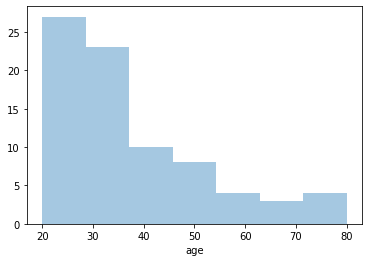

In [2]:
# Histogram
sns.distplot(run_data.age, kde=False)

<AxesSubplot:xlabel='age', ylabel='Density'>

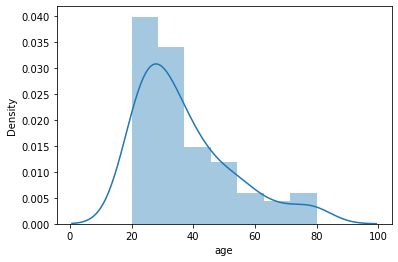

In [3]:
# Histogram and Density
sns.distplot(run_data.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

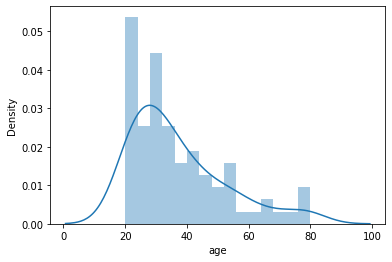

In [4]:
# Histogram and Density - specify # bins
sns.distplot(run_data.age, bins = 15)

## Two-dimensional - Joint Plots

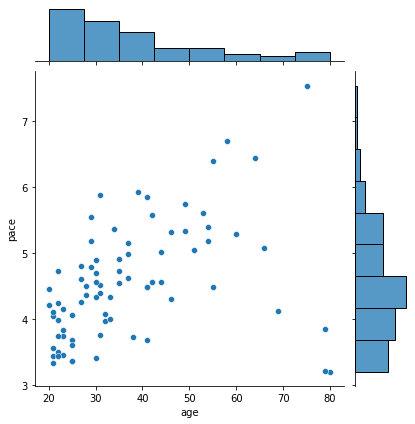

In [5]:
# Joint distribution plot
sns.jointplot(x="age", y="pace", data=run_data)

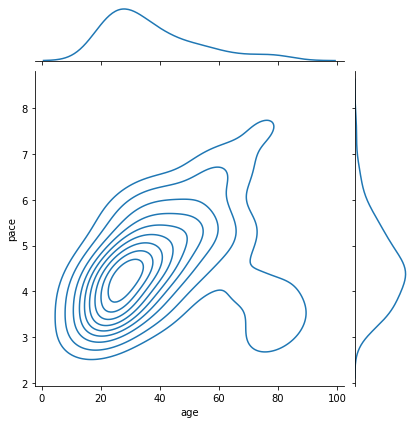

In [6]:
# Joint distribution plot with estimated density
sns.jointplot(x="age", y="pace", data=run_data, kind="kde")

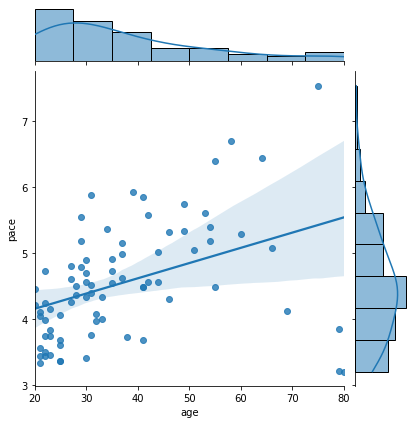

In [7]:
# Joint distribution plot with regression line
sns.jointplot(x="age", y="pace", data=run_data, kind="reg")

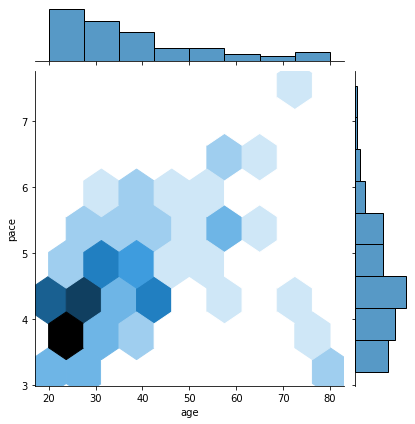

In [8]:
# Joint distribution plot with hexes
sns.jointplot(x="age", y="pace", data=run_data, kind="hex")

# Lab 2.2 - Maximum Likelihood Example - Laplace Distribution

<AxesSubplot:ylabel='Density'>

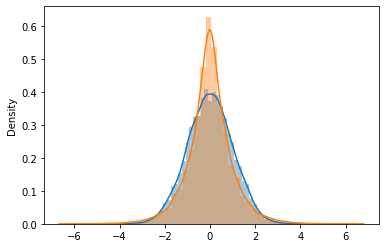

In [9]:
# Generate data
n = 10001
normalData = pd.DataFrame({"data": pd.Series(np.random.normal(0,1,n))})
laplaceData = pd.DataFrame({"data": pd.Series(np.random.laplace(0,1/np.sqrt(2),n))})

# Plot
sns.distplot(normalData)
sns.distplot(laplaceData)

(0.0, 0.1)

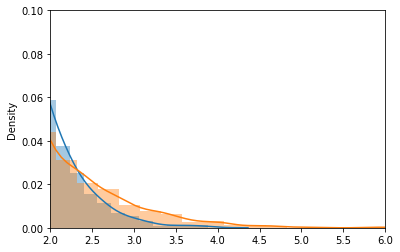

In [10]:
#Zoom in
sns.distplot(normalData)
sns.distplot(laplaceData)
plt.xlim(2,6)
plt.ylim(0,0.1)

In [11]:
## Laplace Negative Log Likelihood
def laplaceNegLogLikelihood(mu, b, y):
    # Stuff...
    neg_log_lik = -np.sum(-np.log(2*b) - abs(y - mu) / b)
    return neg_log_lik

In [12]:
## Laplace Maximum Likelihood Estimate for mu
def maximumLikelihood(y):
    # Stuff...
    RES = so.minimize(laplaceNegLogLikelihood, 1, args=(1, y), method="Powell", tol = 1e-8)
    print(RES)
    return RES.x

# Test the function
maximumLikelihood(laplaceData.values)

   direc: array([[1.]])
     fun: 13982.504002872958
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 2
  status: 0
 success: True
       x: array([-0.00748871])


array([-0.00748871])

In [13]:
# Should give same answer as median!
laplaceData.median()

data   -0.007489
dtype: float64

In [14]:
# Laplace Negative Log Likelihood for regression
def laplaceRegNegLogLikelihood(beta, X, y):
    # Stuff...
    mu = (X@beta).reshape(-1,1)
    return laplaceNegLogLikelihood(mu, 1, y)
    

In [15]:
# Function to maximize regression log likelihood
def maximumRegLikelihood(X, y, negloglik=laplaceRegNegLogLikelihood):
    ### BEGIN SOLUTION
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1))
    RES = so.minimize(negloglik, betas, args=(X,y), method="Powell", tol=1e-8)
    print(RES)
    return RES.x

age = run_data.age.values
X = np.c_[np.ones(age.size), age]
y = run_data.pace.values.reshape(-1,1)

b,loss = maximumRegLikelihood(X,y)


   direc: array([[-1.38691988e-01,  4.62306676e-03],
       [-5.04668507e-05,  9.34573836e-07]])
     fun: 100.72123595988792
 message: 'Optimization terminated successfully.'
    nfev: 565
     nit: 7
  status: 0
 success: True
       x: array([3.33521739, 0.03434783])


# Check this answer against the median regression from Week 1. What do you see?